<a href="https://colab.research.google.com/github/Ancy-padmanabhan/Assignments/blob/main/AncyP_Unsupervised%20Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#load the dataset and display the first 5 rows
data=pd.read_csv('Wine_clust (1).csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [81]:
#Find the count and datatype of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [82]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [83]:
data.shape

(178, 13)

In [84]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [85]:
#check for missing values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

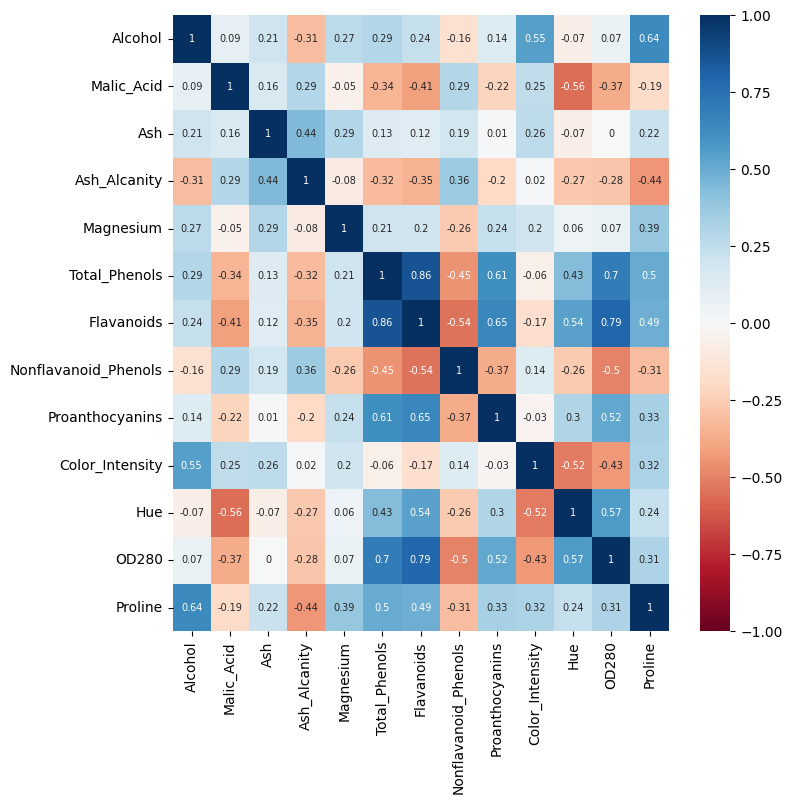

In [86]:
plt.figure(figsize=(8,8))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, annot_kws={"size": 7}, vmin=-1, vmax=1);



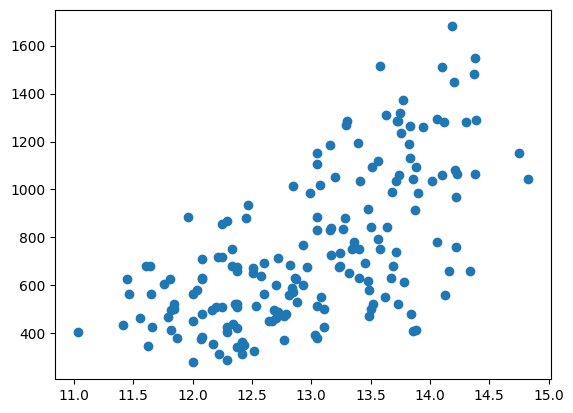

In [87]:
x_axis = data.loc[:, ['Alcohol']]
y_axis = data.loc[:, ['Proline']]

plt.scatter(x_axis, y_axis)

In [88]:
X=data[['Alcohol','Proline']]
X.head()

,Alcohol,Proline
0,14.23,1065
1,13.20,1050
2,13.16,1185
3,14.37,1480
4,13.24,735


In [89]:
#KMeans Clustering
#Finding the number of clusters based on WCSS value
from sklearn.cluster import KMeans

In [90]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

wcss

[17552625.62594213,
 4507966.185337797,
 2337923.9471920775,
 1298952.7127767843,
 886734.5981977141,
 617685.2945177197,
 381436.5002096009,
 292903.7569162238,
 241375.98452137256,
 188482.5927545036]

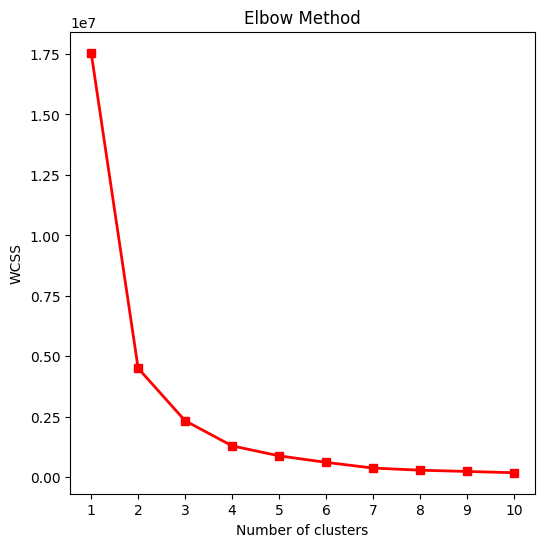

In [91]:
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker='s')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [92]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [93]:
cluster_labels=kmeans.predict(X)
cluster_labels


array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [94]:
data1=data.copy()
data1['Cluster']=cluster_labels
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [95]:
kmeans.cluster_centers_

array([[  12.51666667,  458.23188406],
       [  13.80446809, 1195.14893617],
       [  12.92983871,  728.33870968]])

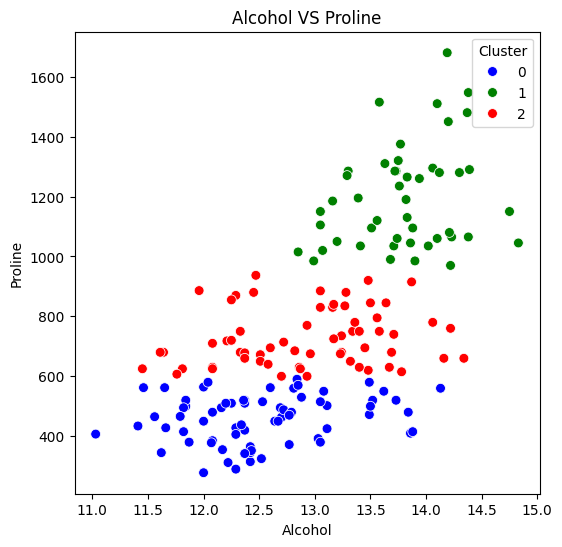

In [96]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Alcohol',y='Proline',data=data1,hue='Cluster',palette=['blue','green','red'],s=50)
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.title('Alcohol VS Proline')
plt.show()

In [97]:
#Agglomerative Clustering
from scipy.cluster.hierarchy import linkage, dendrogram


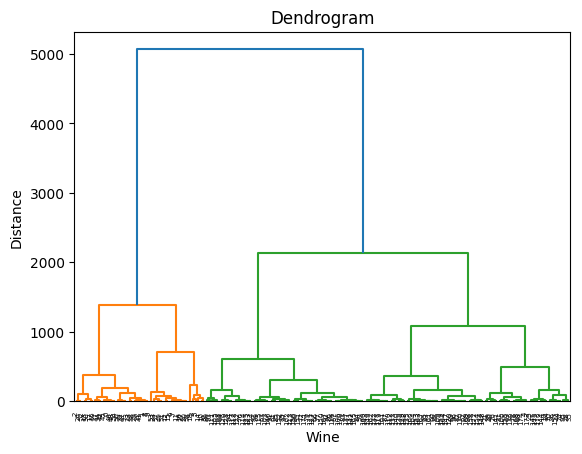

In [98]:
mergings=linkage(X,method='ward')
dendrogram(mergings)
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Distance')
plt.show()

In [99]:
from sklearn.cluster import AgglomerativeClustering
agg_hc=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

y_agg_hc=agg_hc.fit_predict(X)

In [100]:
y_agg_hc

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1])

In [101]:
data1['Cluster'].value_counts()

Cluster
0    69
2    62
1    47
Name: count, dtype: int64

In [102]:
data1['Cluster_Agglo']=y_agg_hc
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster,Cluster_Agglo
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1


In [103]:
data1['Cluster_Agglo'].value_counts()

Cluster_Agglo
1    74
2    57
0    47
Name: count, dtype: int64

In [104]:
# Silhoutte Scores
from sklearn.metrics import silhouette_score

kmeans_silh_scores=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
  kmeans_labels=kmeans.fit_predict(X)
  silh_avg=silhouette_score(X,kmeans_labels)
  kmeans_silh_scores.append(silh_avg)

In [105]:
for k,score in enumerate(kmeans_silh_scores,start=2):
  print(f"number of clusters= {k} and silhoutte score ={score}")

number of clusters= 2 and silhoutte score =0.6605508700594223
number of clusters= 3 and silhoutte score =0.5809325234492815
number of clusters= 4 and silhoutte score =0.5750407161124561
number of clusters= 5 and silhoutte score =0.5660679805900279
number of clusters= 6 and silhoutte score =0.5836922676830884
number of clusters= 7 and silhoutte score =0.5887291236031773
number of clusters= 8 and silhoutte score =0.5759547448713512
number of clusters= 9 and silhoutte score =0.5756664996224227
number of clusters= 10 and silhoutte score =0.5701235524465544


In [106]:
#Principle Component Analysis
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [107]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca = pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
x_pca.head()

,PCA1,PCA2
0,318.108344,0.701481
1,303.106655,-0.303625
2,438.106403,-0.567658
3,733.108005,0.152786
4,-11.892845,0.259119


In [108]:
centers=pca.transform(kmeans.cluster_centers_)
centers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-9.85497140e+01, -4.20743564e-02],
       [ 5.41321655e+02, -7.10865736e-02],
       [-3.03620990e+02, -2.44849304e-02],
       [ 2.84872362e+02,  3.14870826e-01],
       [-2.17065965e+02,  3.39704466e-03],
       [ 7.83440881e+02, -1.64075088e-01],
       [ 1.23306559e+02, -2.12579374e-01],
       [ 3.94607193e+02, -5.54704073e-02],
       [-2.05535136e-01,  1.34723294e-01],
       [-3.99187926e+02,  7.14159545e-05]])

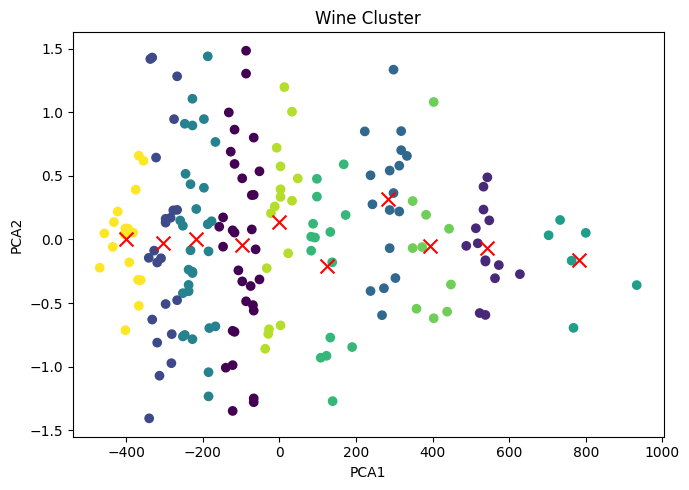

In [109]:
# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(x_pca['PCA1'],x_pca['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()


In [112]:
#DB SCAN Clustering
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X)
data['DBSCAN_labels']=dbscan.labels_


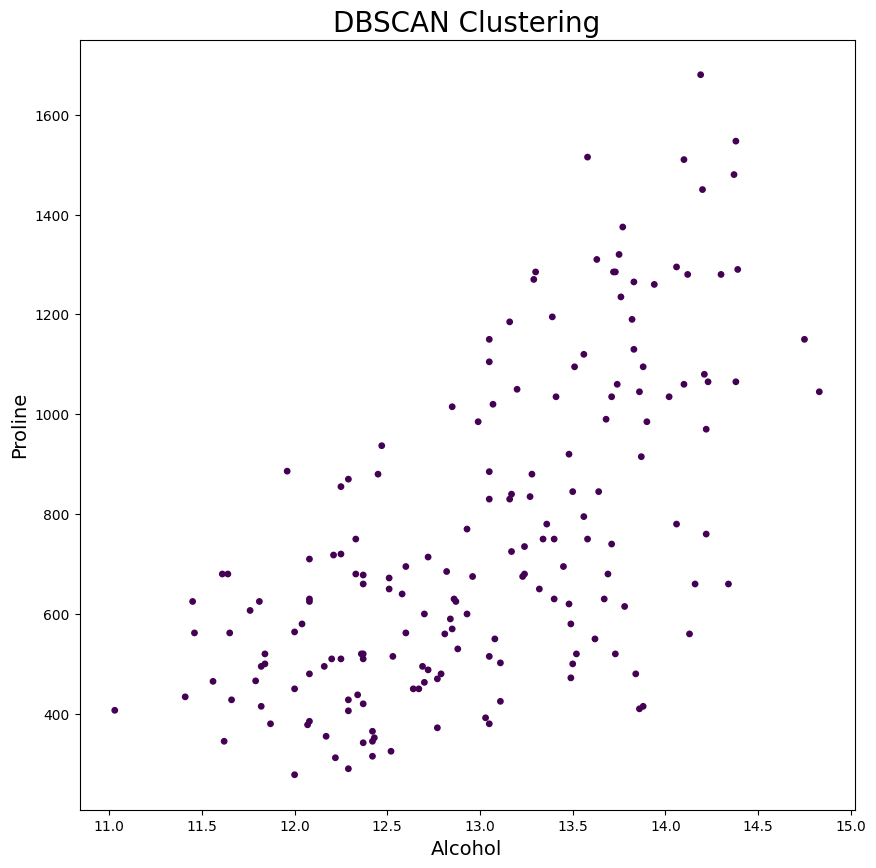

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(data['Alcohol'],data['Proline'],c=data['DBSCAN_labels'],s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Alcohol',fontsize=14)
plt.ylabel('Proline',fontsize=14)
plt.show()

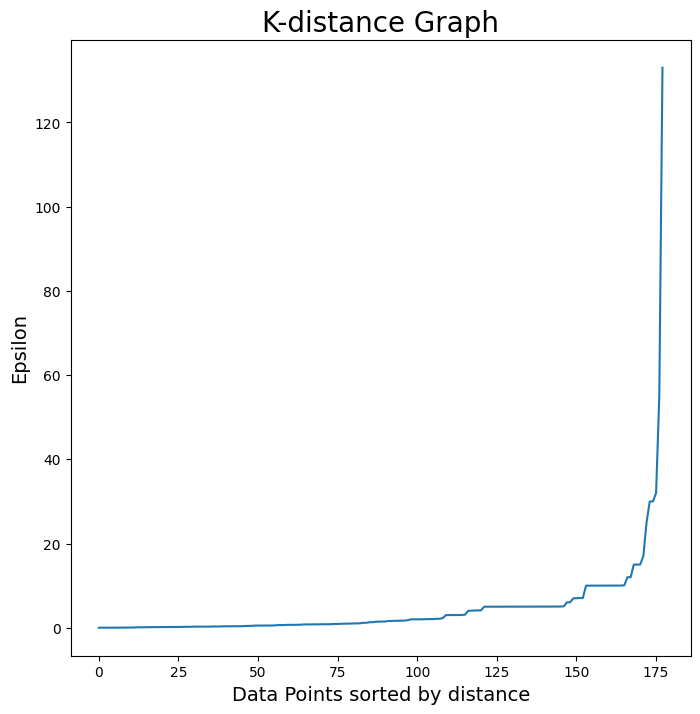

In [124]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,8))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [118]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(X)

DBSCAN(eps=30, min_samples=6)

In [119]:
data1['DBSCAN_opt_labels']=dbscan_opt.labels_
data1['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 1    115
 0     19
-1     18
 2     13
 3     13
Name: count, dtype: int64

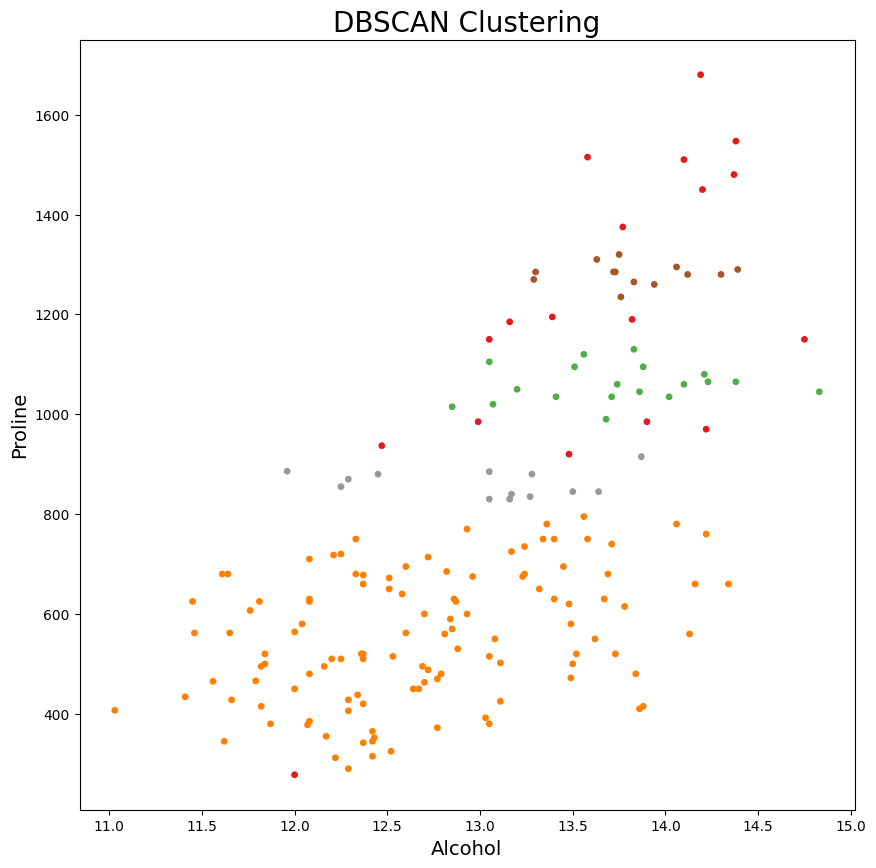

In [123]:
plt.figure(figsize=(10,10))
plt.scatter(data['Alcohol'],data['Proline'],c=data1['DBSCAN_opt_labels'],cmap='Set1',s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Alcohol',fontsize=14)
plt.ylabel('Proline',fontsize=14)
plt.show()